## Baseline Arrest Analysis with Stadium/Arenas and Sports Bars

### ANALYZING/CLEANING ARRESTS DATA 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
arrests =  pd.read_csv('data/arrests_zipcode.csv')
arrests.head(5)

,offense_category,day,zip_code,defendant_race,count,objectid
0,Aggravated Assault,2011-02-21 05:00:00+00,19119,Black,1.0,29259022.0
1,Aggravated Assault,2011-02-21 05:00:00+00,19134,Latinx,1.0,29259023.0
2,Aggravated Assault,2011-02-21 05:00:00+00,19139,Black,1.0,29259024.0
3,Aggravated Assault,2011-02-21 05:00:00+00,19142,Black,1.0,29259025.0
4,Aggravated Assault,2011-02-21 05:00:00+00,19145,Black,1.0,29259026.0


In [3]:
# Drop columns that are not needed
arrests2 = arrests.drop(columns='objectid')
arrests2.head(5)

,offense_category,day,zip_code,defendant_race,count
0,Aggravated Assault,2011-02-21 05:00:00+00,19119,Black,1.0
1,Aggravated Assault,2011-02-21 05:00:00+00,19134,Latinx,1.0
2,Aggravated Assault,2011-02-21 05:00:00+00,19139,Black,1.0
3,Aggravated Assault,2011-02-21 05:00:00+00,19142,Black,1.0
4,Aggravated Assault,2011-02-21 05:00:00+00,19145,Black,1.0


In [4]:
# Convert the 'day' column to a pandas datetime object
arrests2['date'] = arrests2['day'].str.split().str[0]
arrests2['hour'] = arrests2['day'].str.split().str[1]

arrests2.head(5)

,offense_category,day,zip_code,defendant_race,count,date,hour
0,Aggravated Assault,2011-02-21 05:00:00+00,19119,Black,1.0,2011-02-21,05:00:00+00
1,Aggravated Assault,2011-02-21 05:00:00+00,19134,Latinx,1.0,2011-02-21,05:00:00+00
2,Aggravated Assault,2011-02-21 05:00:00+00,19139,Black,1.0,2011-02-21,05:00:00+00
3,Aggravated Assault,2011-02-21 05:00:00+00,19142,Black,1.0,2011-02-21,05:00:00+00
4,Aggravated Assault,2011-02-21 05:00:00+00,19145,Black,1.0,2011-02-21,05:00:00+00


Notice how the date of the arrests go back to 2011... we only care about the the 2018-2019 arrests.

In [5]:
# Filter for 2018 or 2019
arrests2 = arrests2[(arrests2['date'].str[:4] == '2018') | (arrests2['date'].str[:4] == '2019')]
arrests2

,offense_category,day,zip_code,defendant_race,count,date,hour
16048,Aggravated Assault,2019-11-08 05:00:00+00,19154,White,1.0,2019-11-08,05:00:00+00
16049,Aggravated Assault,2019-11-09 05:00:00+00,19107,Latinx,2.0,2019-11-09,05:00:00+00
16050,Aggravated Assault,2019-11-09 05:00:00+00,19119,Black,1.0,2019-11-09,05:00:00+00
16051,Aggravated Assault,2019-11-09 05:00:00+00,19125,Latinx,1.0,2019-11-09,05:00:00+00
16052,Aggravated Assault,2019-11-09 05:00:00+00,19132,Black,1.0,2019-11-09,05:00:00+00
...,...,...,...,...,...,...,...
188271,Drug Sales,2018-06-14 04:00:00+00,19132,Black,2.0,2018-06-14,04:00:00+00
188272,Drug Sales,2018-06-14 04:00:00+00,19133,Black,2.0,2018-06-14,04:00:00+00
188273,Drug Sales,2018-06-14 04:00:00+00,19133,Latinx,6.0,2018-06-14,04:00:00+00
188274,Drug Sales,2018-06-14 04:00:00+00,19134,Black,4.0,2018-06-14,04:00:00+00


### TIMELINES OF ARRESTS

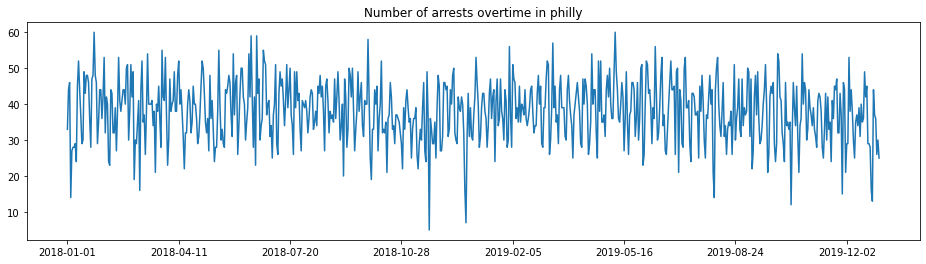

In [6]:
arrests2.groupby('date').size().plot(figsize=(16,4))
plt.title('Number of arrests overtime in philly')
plt.xlabel(None)
plt.show()

This is a plot of the number of arrests spanning from the beginning of 2018 to the end of 2019 in Philly. This visual is overwhelming though and it's hard to see any real trends, so we need to look into the individual seasons. 

<Axes: xlabel='date_dt'>

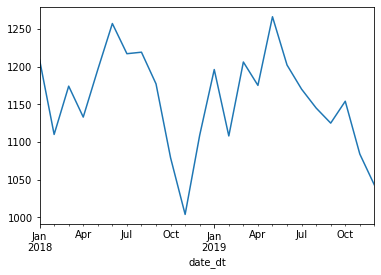

In [7]:
arrests2['date_dt'] = pd.to_datetime(arrests2['date'])
arrests2.set_index('date_dt').resample('1M').size().plot()

This plot is averaging the arrests per day of each month over the 2018-2019 period. Let's look at the beginning and end of the seasons for the sports teams (We are gathering this data from Clean_Sports_Data).
1. Eagles: In their 2018 season, the arrests at the beginning (September) were high at about 1175 arrests per day on average. Their season ended in December, which averaged about 1075 arrests per day. Less, but not as significant of a showing as the dip in November (an average of about 1000 arrests per day). Interestingly, the Eagles lost the most (ratio-ly 1 win : 2 losses) in November of 2018, and in December, they won the most (4 wins : 1 loss). A relationship (arrests decreases as the team looses) is reflected. As the arrests average start to rise again, the Eagles win more.
2. Phillies: Their season runs from March 2018-September 2018.There is a dramatic rise and fall of arrests during this period as shown in the plot above. Confounding variables, such as warmer, summer temperatures leading to more people outside leading to more arrests, are important to note here.
3. 76ers: In the short season of April-May in 2019, there seems to be an increase of about 1,175 arrests per day in April to 1,275 arrests per day in May. in May. While not too substantial, it is interesting that in April the 76ers outcome ratio was 6 wins : 1 loss, while May, when the arrests decreased, was 2 wins: 3 losses. This is against our hypothesis as it demonstrates that there were less arrests in the month they were playing well versus more arrests when they were playing worse.

This goes to show that there is a slight pattern regarding as arrests increase, the sports teams are doing well, and as the arrests decrease, the sports teams lose more, with the exception of the 76ers.

<div class="alert alert-info">

#### Average daily arrests per month

* What you have above is actually the total number of arrests per month

* If you wanted the average daily arrests per month you'd do this
    
    </div>

In [22]:
arrests2.set_index('date_dt').resample('1D').size().resample('1M').mean()

date_dt
2018-01-31    39.000000
2018-02-28    39.642857
2018-03-31    37.870968
2018-04-30    37.766667
2018-05-31    38.580645
2018-06-30    41.900000
2018-07-31    39.258065
2018-08-31    39.322581
2018-09-30    39.233333
2018-10-31    34.806452
2018-11-30    33.466667
2018-12-31    35.774194
2019-01-31    38.580645
2019-02-28    39.571429
2019-03-31    38.903226
2019-04-30    39.166667
2019-05-31    40.838710
2019-06-30    40.066667
2019-07-31    37.741935
2019-08-31    36.935484
2019-09-30    37.500000
2019-10-31    37.225806
2019-11-30    36.133333
2019-12-31    33.645161
Freq: M, dtype: float64

<Axes: xlabel='date_dt'>

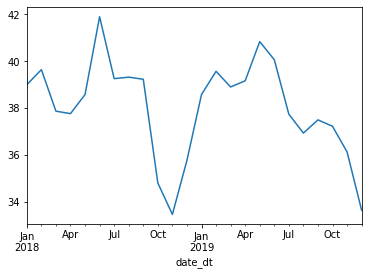

In [23]:
arrests2.set_index('date_dt').resample('1D').size().resample('1M').mean().plot()

**NOTE**

* Shape pretty similar but see differences on y-axis

### ESTABLISH BASELINE OF ARRESTS ON MAP BY ZIPCODE

In [8]:
baseline_arrests = arrests2.groupby(['zip_code'])['count'].mean().reset_index()
baseline_arrests.head(5)

,zip_code,count
0,19102,1.133758
1,19103,1.147619
2,19104,1.320681
3,19106,1.086420
4,19107,1.152493


In [9]:
# Merge the map data with baseline arrests data
philly_map = gpd.read_file("../data_analysis/data/philadelphia_zipcode.geojson")

merged_data = philly_map.merge(baseline_arrests, left_on='CODE', right_on='zip_code', how='left')
merged_data.head(2)

,OBJECTID,CODE,COD,Shape__Area,Shape__Length,geometry,zip_code,count
0,1,19120,20,9.177970e+07,49921.544063,"POLYGON ((-75.11107 40.04682, -75.10943 40.045...",19120,1.203144
1,2,19121,21,6.959879e+07,39534.887217,"POLYGON ((-75.19227 39.99463, -75.19205 39.994...",19121,1.207493


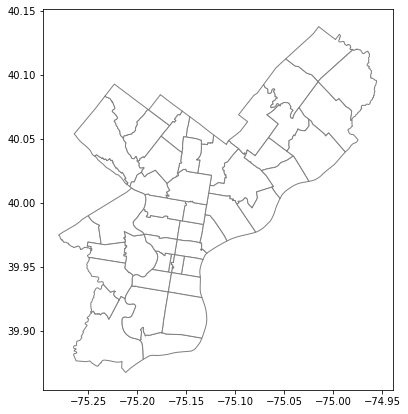

In [10]:
base = philly_map.plot(edgecolor='gray', color='white', figsize=(7,7))

<Axes: >

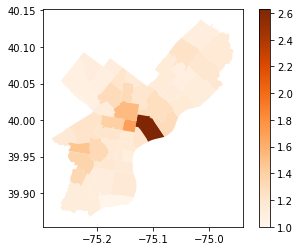

In [11]:
# Baseline arrests data in philadelphia 
merged_data.plot(column='count', legend = True, cmap='Oranges')

<Axes: >

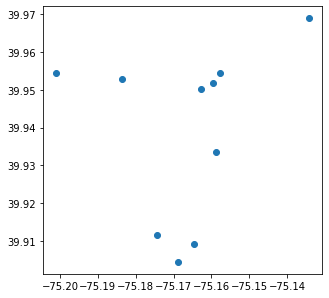

In [12]:
# Add bars on the baselines 
sports_bars_loc_df = pd.read_csv('data/sports_bars_loc.csv')
gpd.points_from_xy(sports_bars_loc_df['Latitude'], sports_bars_loc_df['Longitude'])
sports_bars_loc_gdf = gpd.GeoDataFrame(sports_bars_loc_df,geometry=gpd.points_from_xy(sports_bars_loc_df['Latitude'], sports_bars_loc_df['Longitude']))
sports_bars_loc_gdf.plot(figsize=(5,5))

<Axes: >

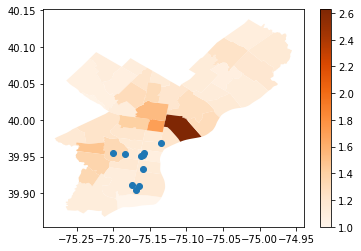

In [13]:
# sports bars and crime rate -- not initially correlated 
base = merged_data.plot(column='count', legend = True, cmap='Oranges')
sports_bars_loc_gdf.plot(ax = base)

<Axes: >

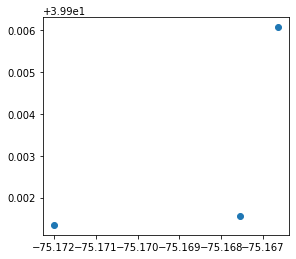

In [14]:
# Now add the stadiums as well
stadiums_loc_df = pd.read_csv('data/stadiums_loc.csv')
gpd.points_from_xy(stadiums_loc_df['Latitude'], stadiums_loc_df['Longitude'])
stadiums_loc_gdf = gpd.GeoDataFrame(stadiums_loc_df,geometry=gpd.points_from_xy(stadiums_loc_df['Latitude'], stadiums_loc_df['Longitude']))
stadiums_loc_gdf.plot()

<Axes: >

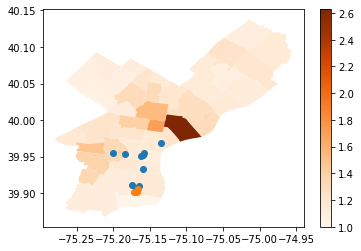

In [15]:
# BASELINE STADIUMS AND SPORTS BARS AND AVERAGE CRIME RATE IN THE ZONE 
base = merged_data.plot(column='count', legend = True,cmap='Oranges')
sports_bars_loc_gdf.plot(ax = base)
stadiums_loc_gdf.plot(ax = base)

* Here we see arrests are not directly correlated with the the locations of the main bars and stadiums on average

Mini Conclusion: We have found data to back up the claim that there is a correlation between the outcomes of the Eagles and Phillies sports teams and the rates of arrests, but there does not seem to be impactful findings about sports bars and stadiums/arenas and their surrounding areas having more arrests with either outcome win or loss.